### Name-Harsh Yadav

# _Importing the data of flower_

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()


# _Data statistics_

In [ ]:
# Print descriptive statistics for each class
print("Descriptive Statistics for 'virginica' class:")
print(df[df['class'] == 'virginica'].describe())

print("\nDescriptive Statistics for 'non-virginica' class:")
print(df[df['class'] == 'non-virginica'].describe())

# _Data splinting into two class_

In [51]:
X = iris.data
y = iris.target

# Redefine the target variable into two classes: 'virginica' and 'non-virginica'
y = ['virginica' if target == 2 else 'non-virginica' for target in y]

# Create a DataFrame combining features and target variable
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['class'] = y

# _Plotting target value for two classes_

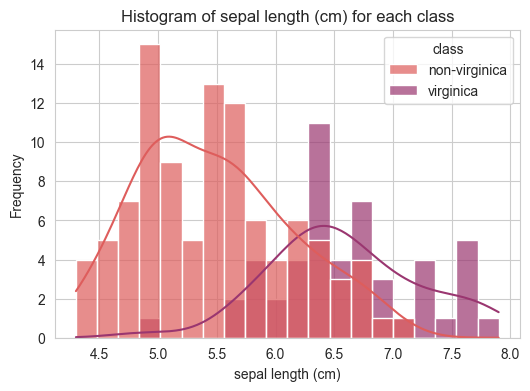

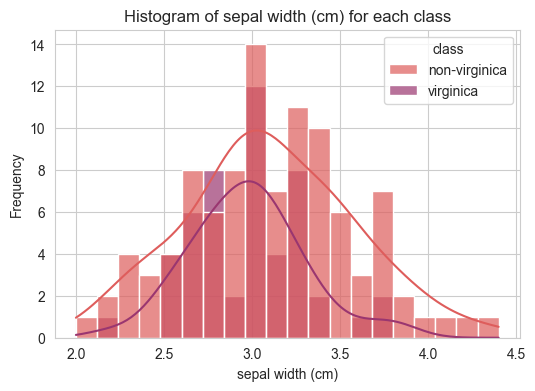

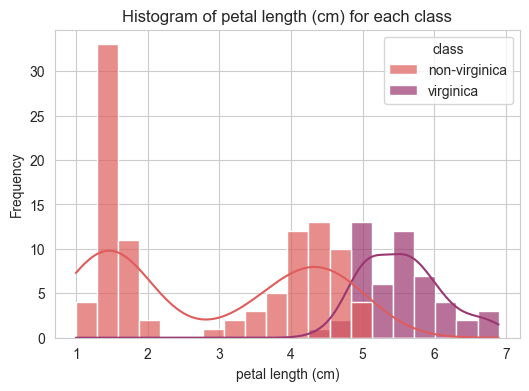

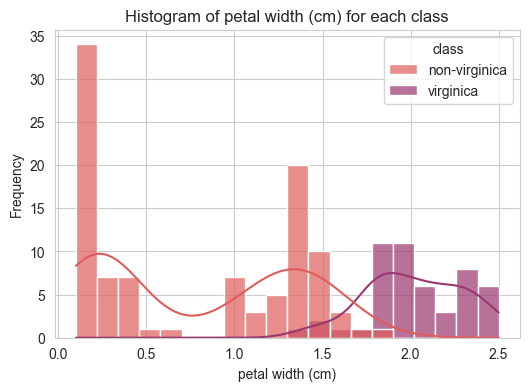

In [60]:
# using hue to show data of two classes in each target value
for feature in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='class', kde=True, bins=20, alpha=0.7, palette='flare')
    plt.title(f'Histogram of {feature} for each class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# _Finding correlation between features_

In [54]:
df_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Print the correlation matrix
print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)   
sepal length (cm)           1.000000         -0.117570           0.871754  \
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


# _Plotting heatmap of correlation_

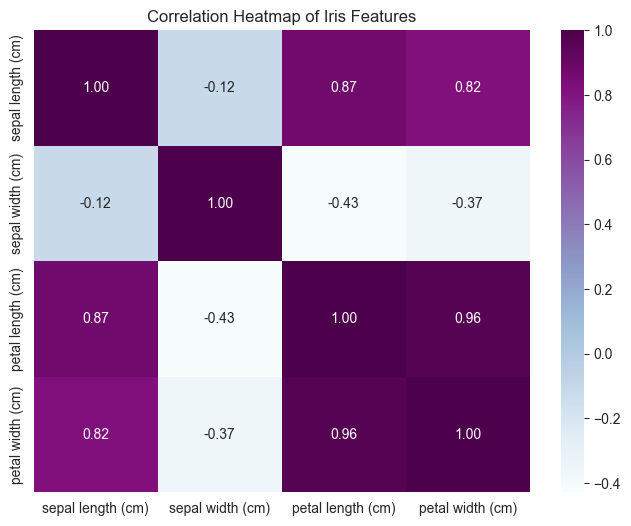

In [92]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Iris Features')
plt.show()

# _Kaggle data explore_

### 1-Sepal Length vs. Sepal Width Scatter Plot:
### Source: Python Iris Data Visualizations1 (https://www.kaggle.com/code/zachgold/python-iris-data-visualizations).
### Graph Description: This scatter plot shows the relationship between sepal length and sepal width for the three Iris species: setosa, versicolor, and virginica. Each point represents an individual flower.
The scatter plot reveals distinct clusters for each Iris species. <br>
Setosa flowers generally have shorter sepals and wider sepals.<br>
Versicolor flowers exhibit intermediate sepal length and width.<br>
Virginica flowers tend to have longer sepals but narrower widths.<br>
Sepal dimensions can be useful for species classification.<br>

### 2-Petal Length vs. Petal Width Scatter Plot:
### Source: Iris Data Visualization2. (https://www.kaggle.com/code/kstaud85/iris-data-visualization)
### Graph Description: This scatter plot visualizes the relationship between petal length and petal width for the three Iris species.
Petal measurements show even clearer separation between species.<br>
Setosa petals are shorter and wider.<br>
Versicolor petals fall in the middle range.<br>
Virginica petals are longer and narrower.<br>
Petal features are highly discriminative for species identification.<br>

### 3-Pairwise Scatter Plot Matrix:
### Source: Visualizing Iris datasets with R ggplot23. (https://www.kaggle.com/code/leolcling/visualizing-iris-datasets-with-r-ggplot2)
### Graph Description: This matrix displays scatter plots for all possible pairs of features (sepal length, sepal width, petal length, and petal width). The diagonal shows histograms for each feature.
The matrix provides a holistic view of feature relationships. <br>
<b>Positive correlations:</b>
Petal length and petal width show a strong positive correlation.<br>
Sepal length and petal length also exhibit a positive correlation.<br>
<b>Negative correlations:</b>
Sepal width and petal width have a negative correlation.<br>
Sepal length and sepal width show a weak negative correlation.<br>
<b>Histograms:</b>
The histograms along the diagonal reveal feature distributions.<br>
Petal length and petal width have distinct peaks for each species.<br>


# _Data splitting_

In [61]:
from sklearn.model_selection import train_test_split

# Split the data into a temporary set (135 records) and a test set (15 records)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=15, random_state=42)

# Split the temporary set into a training set (120 records) and a validation set (15 records)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=15, random_state=42)

# Print the sizes of each set
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Train set size: 120
Validation set size: 15
Test set size: 15


# _Run four logistic regression models_

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to train and evaluate logistic regression model
def train_and_evaluate(X_train, X_val, X_test, y_train, y_val, y_test):
    # Initialize logistic regression model
    model = LogisticRegression(max_iter=1000)
    # Train the model
    model.fit(X_train, y_train)
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    # Calculate accuracy on validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    # Predict on test set
    y_test_pred = model.predict(X_test)
    # Calculate accuracy on test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return val_accuracy, test_accuracy

# Models with 1, 2, 3, and 4 features
for n_features in range(1, 5):
    print(f"Training model with {n_features} feature : ) ")
    # Selecting first n_features columns from the feature sets
    X_train_subset = X_train[:, :n_features]
    X_val_subset = X_val[:, :n_features]
    X_test_subset = X_test[:, :n_features]
    # Train and evaluate model
    val_accuracy, test_accuracy = train_and_evaluate(X_train_subset, X_val_subset, X_test_subset, y_train, y_val, y_test)
    print(f"Validation Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Training model with 1 feature : ) 
Validation Accuracy: 0.8000, Test Accuracy: 0.9333
Training model with 2 feature : ) 
Validation Accuracy: 0.8000, Test Accuracy: 0.8667
Training model with 3 feature : ) 
Validation Accuracy: 1.0000, Test Accuracy: 1.0000
Training model with 4 feature : ) 
Validation Accuracy: 1.0000, Test Accuracy: 1.0000


### Model with 1 feature: This model achieved a validation accuracy of 80% and a test accuracy of 93.33%.

### Model with 2 features: Despite having an additional feature, the validation accuracy remains the same at 80%, but the test accuracy decreases to 86.67%.

### Model with 3 features: The inclusion of a third feature led to a significant improvement, achieving perfect validation accuracy (100%) and perfect test accuracy (100%).

### Model with 4 features: The validation accuracy and test accuracy remain perfect (100%), suggesting that the fourth feature didn't add any further improvement.

_From the results, it seems like adding more features led to better performance initially, but then the performance plateaued. This might indicate that after a certain point, adding more features doesn't significantly improve the model's accuracy. It's also worth noting that the validation accuracy and test accuracy are both perfect (1.0000) for models with 3 and 4 features, indicating that the model might be overfitting to the data._

# _Evaluate the models on the validation set:_

In [86]:
# Create a table
print(f"\nTable for model with {n_features} features:")
print(" Instance Number | Probability of Predicting Virginica  | Predicted Class | Ground Truth")
for i in range(len(X_val_subset)):
    instance_number = i + 1
    prob_virginica = y_val_pred_proba[i][1]  # Probability of predicting Virginica
    predicted_class = model.predict(X_val_subset[i].reshape(1, -1))[0]  # Predicted class
    ground_truth = y_val[i]  # Ground truth
    print(f"{instance_number:^16} | {prob_virginica:^36.4f} | {predicted_class:^15} | {ground_truth:^13}")


Table for model with 4 features:
 Instance Number | Probability of Predicting Virginica  | Predicted Class | Ground Truth
       1         |                0.9014                |    virginica    |   virginica  
       2         |                0.0000                |  non-virginica  | non-virginica
       3         |                0.2120                |  non-virginica  | non-virginica
       4         |                0.0000                |  non-virginica  | non-virginica
       5         |                0.0000                |  non-virginica  | non-virginica
       6         |                0.0796                |  non-virginica  | non-virginica
       7         |                0.9765                |    virginica    |   virginica  
       8         |                0.0610                |  non-virginica  | non-virginica
       9         |                0.1695                |  non-virginica  | non-virginica
       10        |                0.7165                |    virgin